In [1]:
import torch
import numpy as np
from easy_transformer import EasyTransformer, EasyTransformerConfig
import easy_transformer
import tqdm
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


cpu


In [2]:
vocab_size = 200
sequence_length = 10
batch_size = 64

tiny_cfg = EasyTransformerConfig(
    d_model=32,
    d_head=8,
    n_heads=4,
    d_mlp=32,
    n_layers=2,
    n_ctx=200,
    act_fn="solu_ln",
    d_vocab=vocab_size,
    normalization_type="LN",
    seed=0,
)
tiny_model = EasyTransformer(tiny_cfg).to(device)
cross_entropy_loss = torch.nn.CrossEntropyLoss()

Moving model to device:  cpu
Moving model to device:  cpu


In [3]:
start_token = 0
sep_token = 1
ignore_token = 2
num_special_tokens = 3


In [4]:
from algorithmic_tasks.count_greater_than_x import gen
eval_inputs, eval_outputs = gen(1000,  tiny_model.cfg.d_vocab, 20)

In [5]:
eval_outputs

tensor([[199,   1,   2,  ...,  10,  10,  10],
        [199,   0,   0,  ...,   3,   4,   4],
        [199,   0,   0,  ...,   3,   4,   4],
        ...,
        [199,   1,   1,  ...,  13,  13,  14],
        [199,   1,   2,  ...,  11,  12,  12],
        [199,   0,   1,  ...,  13,  13,  14]])

In [6]:
def get_loss(model, inputs, outputs):
    inputs = inputs.to(device)
    outputs = outputs.to(device)
    
    output_logits = model(inputs, return_type="logits")

    seq_len = inputs.shape[1]

    loss = cross_entropy_loss(
        output_logits[:,:].reshape((-1,vocab_size)),
        outputs[:,:].reshape((-1,)))
    
    return loss

def evaluate_model(model, batch_size, print_output, number_to_print=0):
    vocab_size = model.cfg.d_vocab
    inputs,outputs = gen(batch_size,vocab_size,random.randint(5,150))

    loss = get_loss(model,inputs,outputs)

    if print_output:
      eval_loss = get_loss(model,eval_inputs, eval_outputs)
      print(eval_loss.item())

    return loss

In [19]:
loss_history = []
print('Start training')
tiny_optimizer = torch.optim.Adam(tiny_model.parameters(), lr=4e-3)
loss = evaluate_model(tiny_model, batch_size=3000, print_output=True)
for epoch in tqdm.tqdm(range(30000)):
    loss = evaluate_model(tiny_model, batch_size=batch_size, print_output=epoch % 300 == 0, number_to_print=0)
    loss.backward()
    loss_history.append(loss.item())
    tiny_optimizer.step()
    tiny_optimizer.zero_grad()

Start training
1.7886767387390137


  0%|          | 2/30000 [00:00<40:05, 12.47it/s]

1.7886767387390137


  1%|          | 303/30000 [00:15<30:58, 15.98it/s]

1.1598230600357056


  2%|▏         | 602/30000 [00:29<20:23, 24.02it/s]

1.0699621438980103


  3%|▎         | 901/30000 [00:44<28:21, 17.10it/s]

0.9587898254394531


  4%|▍         | 1202/30000 [01:00<29:37, 16.20it/s]

0.7818443179130554


  5%|▌         | 1502/30000 [01:15<30:59, 15.32it/s]

0.8376702070236206


  6%|▌         | 1801/30000 [01:29<22:48, 20.61it/s]

0.6614168882369995


  7%|▋         | 2104/30000 [01:45<24:18, 19.12it/s]

0.6374502182006836


  8%|▊         | 2402/30000 [01:58<22:56, 20.05it/s]

0.5512372255325317


  9%|▉         | 2705/30000 [02:14<22:54, 19.85it/s]

0.4758186340332031


 10%|█         | 3001/30000 [02:28<25:03, 17.96it/s]

0.5416402220726013


 11%|█         | 3300/30000 [02:42<18:31, 24.02it/s]

0.4555571377277374


 12%|█▏        | 3603/30000 [02:57<22:41, 19.38it/s]

0.519335150718689


 13%|█▎        | 3903/30000 [03:12<24:24, 17.82it/s]

0.4564538300037384


 14%|█▍        | 4202/30000 [03:28<21:07, 20.36it/s]

0.33762526512145996


 15%|█▌        | 4501/30000 [03:43<25:42, 16.53it/s]

0.30843713879585266


 16%|█▌        | 4805/30000 [03:59<19:27, 21.58it/s]

0.3289855122566223


 17%|█▋        | 5103/30000 [04:13<19:14, 21.56it/s]

0.335191935300827


 18%|█▊        | 5404/30000 [04:28<24:33, 16.69it/s]

0.263857364654541


 19%|█▉        | 5703/30000 [04:43<21:58, 18.43it/s]

0.27250513434410095


 20%|██        | 6004/30000 [04:57<17:30, 22.84it/s]

0.29294902086257935


 21%|██        | 6306/30000 [05:13<13:09, 30.02it/s]

0.280961811542511


 22%|██▏       | 6601/30000 [05:27<17:10, 22.70it/s]

0.3099154829978943


 23%|██▎       | 6903/30000 [05:42<20:18, 18.95it/s]

0.2665858566761017


 24%|██▍       | 7203/30000 [05:58<20:57, 18.13it/s]

0.23843196034431458


 25%|██▌       | 7504/30000 [06:13<17:30, 21.41it/s]

0.35712435841560364


 26%|██▌       | 7802/30000 [06:28<21:20, 17.33it/s]

0.3397879898548126


 27%|██▋       | 8101/30000 [06:44<21:06, 17.30it/s]

0.18652814626693726


 28%|██▊       | 8401/30000 [07:00<20:49, 17.29it/s]

0.24196675419807434


 29%|██▉       | 8704/30000 [07:16<16:39, 21.30it/s]

0.193325474858284


 30%|███       | 9005/30000 [07:31<16:11, 21.62it/s]

0.23689129948616028


 31%|███       | 9303/30000 [07:47<16:38, 20.73it/s]

0.19411149621009827


 32%|███▏      | 9603/30000 [08:02<18:59, 17.91it/s]

0.27612075209617615


 33%|███▎      | 9903/30000 [08:17<17:33, 19.07it/s]

0.18455493450164795


 34%|███▍      | 10203/30000 [08:33<20:27, 16.12it/s]

0.2494814395904541


 35%|███▌      | 10504/30000 [08:48<15:05, 21.53it/s]

0.1873023360967636


 36%|███▌      | 10801/30000 [09:02<24:35, 13.01it/s]

0.1657515913248062


 37%|███▋      | 11104/30000 [09:18<16:16, 19.36it/s]

0.1694824993610382


 38%|███▊      | 11401/30000 [09:33<15:16, 20.29it/s]

0.1700642853975296


 39%|███▉      | 11705/30000 [09:48<11:09, 27.34it/s]

0.14862343668937683


 40%|████      | 12001/30000 [10:03<19:21, 15.50it/s]

0.1926560401916504


 41%|████      | 12303/30000 [10:18<12:41, 23.25it/s]

0.24432373046875


 42%|████▏     | 12607/30000 [10:34<12:45, 22.73it/s]

0.15538692474365234


 43%|████▎     | 12904/30000 [10:48<16:23, 17.38it/s]

0.14795330166816711


 44%|████▎     | 13080/30000 [10:57<14:11, 19.88it/s]


KeyboardInterrupt: 

In [20]:
torch.save(tiny_model,"model")

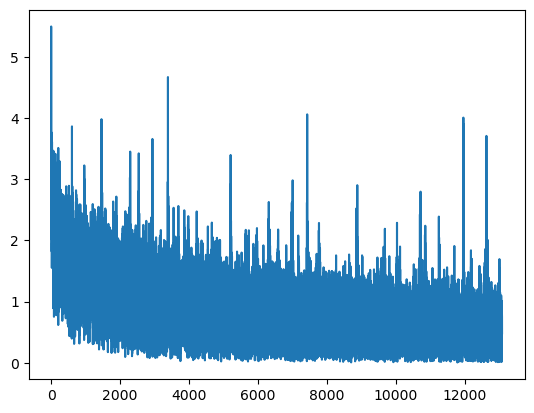

In [21]:
plt.plot(loss_history)

In [46]:
import pysvelte

def display_vectors(x,d=4):
    weights = torch.sum(x**3,dim=0)
    strongest = torch.argsort(weights)[-d:].flip(dims=(0,))
    plt.imshow(x.transpose(0,1)[strongest])
    plt.show()


def show_attention_pattern_for_input(model, inputs,outputs):
    model_cache={}
    model.cache_all(model_cache) # remove_batch_dim=True
    model(inputs)
    model.reset_hooks()
    
    pysvelte.AttentionMulti(tokens=[str(x) for x in inputs[0].tolist()], attention=model_cache['blocks.0.attn.hook_attn'][0].permute(1, 2, 0)).show()
    display_vectors(model_cache["blocks.0.mlp.hook_post"][0])
    
    pysvelte.AttentionMulti(tokens=[str(x) for x in outputs[0].tolist()], attention=model_cache['blocks.1.attn.hook_attn'][0].permute(1, 2, 0)).show()


In [42]:
inputs,outputs = gen(3,vocab_size,20)
output_logits = tiny_model(inputs, return_type="logits")
predictions = output_logits.argmax(dim=2)

[[ 60  97 158  53  50 128 124  25 106  99 182  23 121  38   4 181 137  29
   80 194 125]
 [199   1   2   2   2   3   4   4   5   6   7   7   8   8   8   9  10  10
   11  12  13]
 [199   1   2   2   2   3   4   4   5   6   7   7   8   8   8   9  10  10
   11  12  13]]


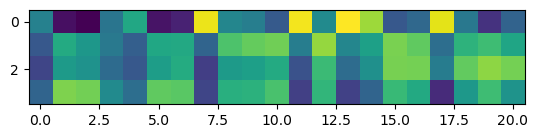

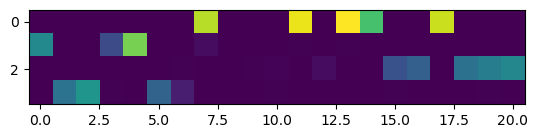

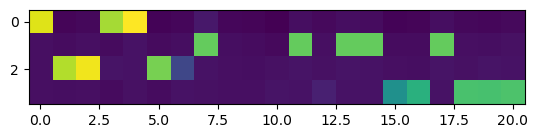

In [45]:
print(np.array([
    inputs[0].tolist(),
    outputs[0].tolist(),
    predictions[0].tolist()
  ]))

show_attention_pattern_for_input(tiny_model,inputs,outputs)

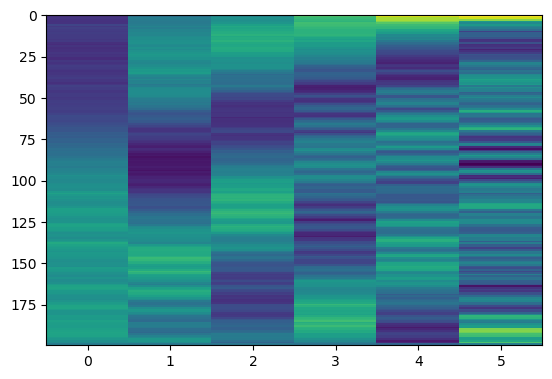

In [26]:
import matplotlib.pyplot as plt

embeds = tiny_model.embed.W_E.detach().cpu()
embeds = embeds[:,torch.argsort(embeds[0])]
plt.imshow(torch.pca_lowrank(embeds,center=True,q=6)[0],aspect=0.02)

In [32]:
#model_cache={}
#tiny_model.cache_all(model_cache) # remove_batch_dim=True
inputs,outputs = gen(100,vocab_size,20)
output = tiny_model(inputs)
torch.mean(output**3).backward()
print((tiny_model.blocks[0].attn.z.grad.mean(dim=(0,1,3))))
#tiny_model.reset_hooks()

tensor([-0.4443,  0.0216,  0.0504, -0.2674])


In [ ]:
print(model_cache["blocks.0.attn.hook_z"][0].shape)
print(model_cache["blocks.0.hook_attn_out"][0].shape)
print(model_cache["blocks.0.hook_attn_out"][0].shape)
print(model_cache["blocks.0.mlp.hook_pre"][0].shape)

torch.Size([21, 4, 8])
torch.Size([21, 32])
torch.Size([21, 32])
torch.Size([21, 32])


In [ ]:
model_cache.keys()

dict_keys(['hook_embed', 'hook_pos_embed', 'blocks.0.hook_resid_pre', 'blocks.0.ln1.hook_scale', 'blocks.0.ln1.hook_normalized', 'blocks.0.attn.hook_q', 'blocks.0.attn.hook_k', 'blocks.0.attn.hook_v', 'blocks.0.attn.hook_attn_scores', 'blocks.0.attn.hook_attn', 'blocks.0.attn.hook_z', 'blocks.0.hook_attn_out', 'blocks.0.hook_resid_mid', 'blocks.0.ln2.hook_scale', 'blocks.0.ln2.hook_normalized', 'blocks.0.mlp.hook_pre', 'blocks.0.mlp.hook_mid', 'blocks.0.mlp.ln.hook_scale', 'blocks.0.mlp.ln.hook_normalized', 'blocks.0.mlp.hook_post', 'blocks.0.hook_mlp_out', 'blocks.0.hook_resid_post', 'blocks.1.hook_resid_pre', 'blocks.1.ln1.hook_scale', 'blocks.1.ln1.hook_normalized', 'blocks.1.attn.hook_q', 'blocks.1.attn.hook_k', 'blocks.1.attn.hook_v', 'blocks.1.attn.hook_attn_scores', 'blocks.1.attn.hook_attn', 'blocks.1.attn.hook_z', 'blocks.1.hook_attn_out', 'blocks.1.hook_resid_mid', 'blocks.1.ln2.hook_scale', 'blocks.1.ln2.hook_normalized', 'blocks.1.mlp.hook_pre', 'blocks.1.mlp.hook_mid', 'bl

In [ ]:
model_cache["blocks.0.attn.hook_z"].grad

In [39]:
torch.tensor([2,3,4,5])>>2

tensor([0, 0, 1, 1])